In [37]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")

df
df = df.drop(columns=['Name','Ticket'])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


Probabilidades:

    F1: S = 91/94 = 0.968
    F2: S = 70/76 = 0.92
    F3: S = 0.5 ## ignorar
    
    M1: S = 45/(45+77) = 0.37 ## ignorar
    M2: S = 17/(91+17) = 0.157 ## ignorar
    M3: S = 47/(300+47) = 0.135 ## ignorar
    
    sem filhos:233/(445+233) = 0.34
    irmaos >5 = 0
    irmaos >=2 <=4 = 7/27 = 0.26
    
    male_2_p0 = 0.09
    male_3_p0 = 0.12
    male_1_p0 = 0.36
    
        ordem:
        mulheres
        male_2_p0
    
    
    

In [38]:
pd.crosstab([df.Sex,df.Pclass,df.Parch],df.Survived,margins=True) 

Survived               0    1  All
Sex    Pclass Parch               
female 1      0        1   63   64
              1        0   17   17
              2        2   11   13
       2      0        5   40   45
              1        1   17   18
              2        0   11   11
              3        0    2    2
       3      0       35   50   85
              1       13   12   25
              2       17    8   25
              3        1    1    2
              4        2    0    2
              5        3    1    4
              6        1    0    1
male   1      0       63   36   99
              1       10    4   14
              2        3    5    8
              4        1    0    1
       2      0       81    8   89
              1        7    7   14
              2        3    2    5
       3      0      260   36  296
              1       22    8   30
              2       15    3   18
              3        1    0    1
              4        1    0    1
              5        1    0    1
All                  549  342  891

In [39]:
for i in range (891):
    if (df.at[i,'Parch'] == 0 and df.at[i,'Sex'] == 'male' and df.at[i,'Pclass'] == 2):
        df = df.drop(i)
    elif (df.at[i,'Parch'] == 0 and df.at[i,'Sex'] == 'male' and df.at[i,'Pclass'] == 1):
        df = df.drop(i)
    elif (df.at[i,'Parch'] == 0 and df.at[i,'Sex'] == 'male' and df.at[i,'Pclass'] == 3):
        df = df.drop(i)
    elif (df.at[i,'Sex'] == 'female' and df.at[i,'Pclass'] == 2):
        df =df.drop(i)
    elif (df.at[i,'Sex'] == 'female' and df.at[i,'Pclass'] == 1):
        df =df.drop(i)


In [40]:
for i in df.index:
    
    if (df.at[i,"Sex"] == 'female' and df.at[i,'SibSp'] > 3):
        df = df.drop(i)
    elif (df.at[i,'Parch'] == 0 and df.at[i,'Sex'] == 'male' and df.at[i,'Pclass'] == 1):
        df = df.drop(i)
    elif df.at[i,"Sex"] == 'male' and df.at[i,"Pclass"] == 3:
        df = df.drop(i)


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  from ipykernel import kernelapp as app


Object `plt.hist()` not found.


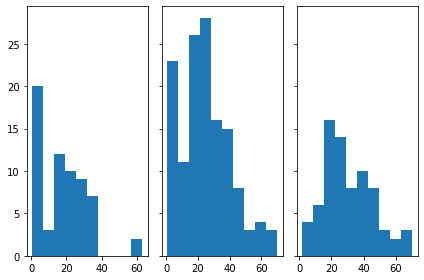

In [58]:
import matplotlib.pyplot as plt


def sobreviver():
    s = []
    for i in df.index:
        if df.at[i,'Survived'] == 1:
            s.append(df.at[i,'Age'])
    return(s)

def morrer():
    s = np.array([])
    for i in df.index:
        if df.at[i,'Survived'] == 0:
            if df.at[i,'Age'] == []:
                s = np.append(s,0)
            else:
                s = np.append(s,(df.at[i,'Age']))
    return (s)               

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

axs[0].hist(sobreviver(),bins=10)
axs[1].hist(df.Age,bins=10)
axs[2].hist(morrer(),bins=10)
?plt.hist()

In [59]:


import numpy as np
from scipy.stats import norm


# Fit a normal distribution to the data:

print(morrer())
mu, std = norm.fit(morrer())

print(std)

[14.  31.   8.  19.  18.  40.  18.  65.  28.  21.  14.5 20.  17.  24.
 54.  47.   nan 19.   9.  36.5 51.  45.   2.   nan  nan  nan 25.  29.
 41.  52.   nan 37.  45.  24.  43.  38.  45.   3.  27.  31.  21.  20.
  nan  nan 10.  28.  21.  64.  36.  22.   nan 21.   nan 37.  23.  30.
  nan 29.   nan  nan 39.  26.   9.  31.  41.   2.  18.  32.  58.  43.
  nan 60.  25.  49.  18.  25.  48.  70.  30.5 30.  18.  23.  31.  28.
  9.  22.  39.   nan]
nan


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  from ipykernel import kernelapp as app


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


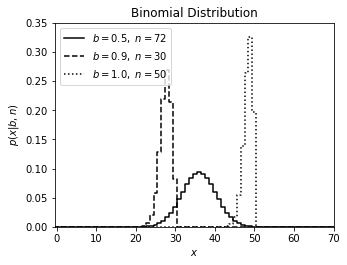

In [43]:
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt


n_values = [72, 30, 50]
b_values = [0.5, 0.92, 0.968]
linestyles = ['-', '--', ':']
x = np.arange(-1, 2000)


fig, ax = plt.subplots(figsize=(5, 3.75))

for (n, b, ls) in zip(n_values, b_values, linestyles):
    # create a binomial distribution
    dist = binom(n, b)

    plt.plot(x, dist.pmf(x), color='black', linestyle='steps-mid' + ls,
             label=r'$b=%.1f,\ n=%i$' % (b, n))

plt.xlim(-0.5, 70)
plt.ylim(0, 0.35)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|b, n)$')
plt.title('Binomial Distribution')

plt.legend()
plt.show()


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


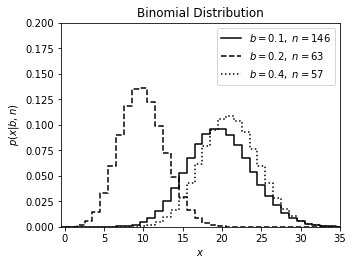

In [44]:
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt


n_values = [146, 63, 57]
b_values = [ 47/(300+47),17/(91+17), 45/(45+77)]
linestyles = ['-', '--', ':']
x = np.arange(-1, 2000)


fig, ax = plt.subplots(figsize=(5, 3.75))

for (n, b, ls) in zip(n_values, b_values, linestyles):
    # create a binomial distribution
    dist = binom(n, b)

    plt.plot(x, dist.pmf(x), color='black', linestyle='steps-mid' + ls,
             label=r'$b=%.1f,\ n=%i$' % (b, n))

plt.xlim(-0.5, 35)
plt.ylim(0, 0.2)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|b, n)$')
plt.title('Binomial Distribution')

plt.legend()
plt.show()